# CS114.M11 - Máy học
---
### 19521322 - Huỳnh Ngọn Công Danh
### 19521858 - Võ Tuấn Minh
### 19522524 - Nguyễn Phú Vinh

# Tài liệu tham khảo
1. Dataset, training: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
2. Camera Capture: [Google Colab](https://colab.research.google.com/#snippetFileIds=%2Fv2%2Fexternal%2Fnotebooks%2Fsnippets%2Fadvanced_outputs.ipynb&snippetQuery=Camera%20Capture)
3. Smoothing Images: https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html
4. Thresholding Images: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
5. Resize image: https://www.pyimagesearch.com/2021/01/20/opencv-resize-image-cv2-resize/
6. Pyplot image: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
7. Crop with contour: https://stackoverflow.com/questions/44588279/find-and-draw-the-largest-contour-in-opencv-on-a-specific-color-python
8. Normalize image: https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#normalize


# **1.Train model và đánh giá**

## **1.1 Import thư viện**

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os

## **1.2 Load data & plot data**

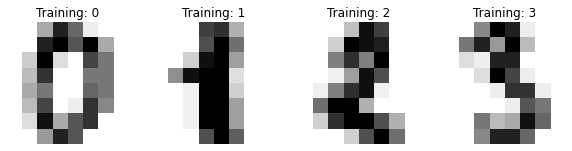

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## **1.3 Kiểm tra dữ liệu** 

In [ ]:
for i in range(4):
  print("Image", i + 1, ": ")
  print("Matrix:", digits.images[i])
  print("Size: ", digits.images[i].shape)
  print("Min: ", np.min(digits.images[i]))
  print("Max: ", np.max(digits.images[i]))
  print("===========================================");

Image 1 : 
Matrix: [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Size:  (8, 8)
Min:  0.0
Max:  15.0
Image 2 : 
Matrix: [[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
Size:  (8, 8)
Min:  0.0
Max:  16.0
Image 3 : 
Matrix: [[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]
Size:  (8, 8)
Min:  0.0
Max:  

In [ ]:
print("Shape: ", digits.images.shape)
print("Min: %d" % np.min(digits.images))
print("Max: %d" % np.max(digits.images))

Shape:  (1797, 8, 8)
Min: 0
Max: 16


- Sau khi xem xét dữ liệu, nhóm nhận thấy:
  + Dữ liệu có 1797 ảnh
  + Mỗi ảnh là 1 ma trận 8 x 8
  + Giá trị của mỗi pixel nằm trong khoảng [0, 16]

## **1.4 Train model**

- Nhóm em phân chia bộ dữ liệu thành 2 tập train và test với tỉ lệ 8 : 2

In [ ]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

clf = svm.SVC(gamma=0.001)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False
)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

## **1.5 Hiển thị kết quả dự đoán**

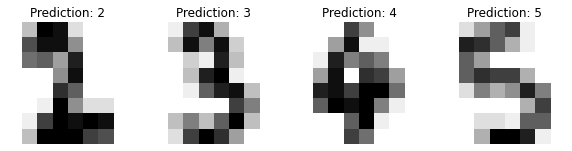

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

## **1.6 Đánh giá**

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.97      0.81      0.88        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.84      0.94      0.89        33
           9       0.95      0.95      0.95        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360




- Các giá trị precision, recal, f1-score cho kết quả đều bằng 0.96. Các kết quả này khá tốt khi đánh giá trên tập test

Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  2  0  1  4  0]
 [ 0  0  0  0 34  0  0  0  2  1]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  0  0  0  0  0  0 31  1]
 [ 0  0  0  1  0  1  0  0  0 35]]


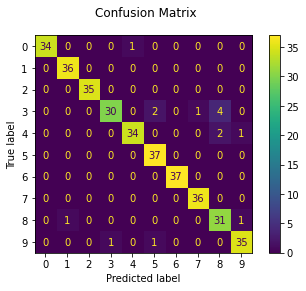

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# **2. Thử nghiệm trên ảnh**

In [ ]:
# Hàm hiển thị ảnh RGB
def show_img(img):
  plt.figure(figsize=(3, 3))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation="nearest")
  plt.xticks([])
  plt.yticks([])
  plt.show

In [ ]:
# Hàm hiển thị ảnh
def show_img_bi(img):
  plt.figure(figsize=(3, 3))
  plt.imshow(img,cmap=plt.cm.gray_r, interpolation="nearest")
  plt.xticks([])
  plt.yticks([])
  plt.show

In [ ]:
def show_2img_bi(img1, img2, title1="", title2=""):
  _, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
 
  axes[0].imshow(img1, cmap=plt.cm.gray_r, interpolation="nearest")
  axes[0].set_title(title1)

  axes[1].imshow(img2, cmap=plt.cm.gray_r, interpolation="nearest")
  axes[1].set_title(title2)

## **2.1 Các bước tiền xử lý**

### 2.1.1 Đọc ảnh

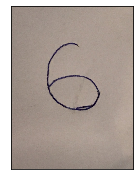

In [ ]:
img = cv2.imread('/content/_6.jpg')
show_img(img)

### 2.1.2 Smoothing image

Sử dụng phương pháp Gaussian Blurring với Gaussian kernel size = (5, 5). Mục đích là loại bỏ nhiễu, làm mịn ảnh

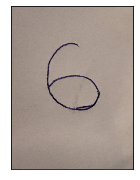

In [ ]:
blured = cv2.GaussianBlur(img, (5, 5), 0)
show_img(blured)

### 2.1.3 Tăng độ tương phản, tăng độ sáng

Mục đích làm nổi bật chữ số, giảm các chi tiết có màu tối

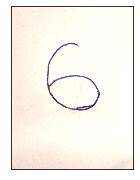

In [ ]:
alpha = 1.5
beta = 30
new_image=cv2.addWeighted(blured,alpha,np.zeros(blured.shape, blured.dtype),0,beta)
show_img(new_image)

### 2.1.4 Chuyển sang ảnh grayscale

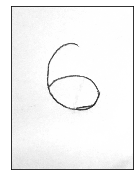

In [ ]:
gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
show_img(gray)

### 2.1.5 Phân ngưỡng (chuyển ảnh sang ảnh đen trắng)

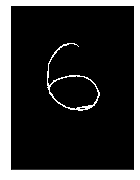

In [ ]:
 _, thresh_hold = cv2.threshold(gray, 190, 255, cv2.THRESH_BINARY_INV)
 show_img(thresh_hold)

### 2.1.6 Crop ảnh

- Mục tiêu là lấy ra chữ số và loại bỏ các phần dư thừa

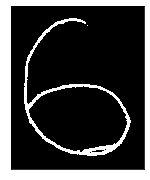

In [ ]:
def crop_image(img_thresh_hod):
  contours, h = cv2.findContours(img_thresh_hod, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  contours = sorted(contours, key=cv2.contourArea, reverse=True)
  (x, y, w, h) = cv2.boundingRect(contours[0])

  # Lấy thêm 50 pixel làm padding
  # Để khi resize các đặc trưng được giữ lại tốt hơn
  crop = img_thresh_hod[y - 50: y + h + 50, x - 50: x + w + 50]
  return crop

crop = crop_image(thresh_hold)
show_img(crop)

### 2.1.7 Resize ảnh về (8,8)

- Mục đích đưa về cùng kích thước với data train

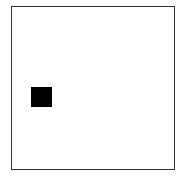

In [ ]:
# 2.1.7: Case 1
resize = cv2.resize(crop, (8, 8))
show_img_bi(resize)

- Khi resize ảnh 1 lần duy nhất thì các đặc trưng trong ảnh gần như biến mất, ta không còn nhìn ra chữ số trong ảnh nữa. Nên nhóm quyết định resize nhiều lần

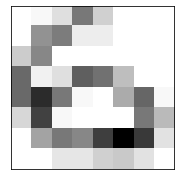

In [ ]:
# 2.1.7: Case 2
def resize_many_times_8x8(crop):
  resize = crop.copy()
  while resize.shape[0] >= 16:
    resize = cv2.resize(resize, (0, 0),fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

  resize = cv2.resize(resize, (8, 8), interpolation=cv2.INTER_LINEAR)
  return resize
resize = resize_many_times(crop)
show_img_bi(resize)

- Sau khi resize nhiều lần thì ta có thể dễ nhìn thấy chữ số trong ảnh hơn

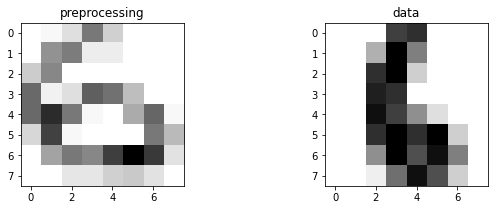

In [ ]:
show_2img_bi(resize, digits.images[6], "preprocessing", "data")

- Để cho ảnh sau khi xử lý giống với dữ liệu hơn thì nhóm không resize trực tiếp về (8, 8) mà resize về (6, 8) và thêm padding

In [ ]:
# 2.1.7: Case 3
def resize_many_times_6x8(crop):
  resize = crop.copy()
  while resize.shape[0] >= 16:
    resize = cv2.resize(resize, (0, 0),fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

  resize = cv2.resize(resize, (6, 8), interpolation=cv2.INTER_LINEAR)
  return resize

In [ ]:
resize = resize_many_times_6x8(crop)
def add_padding(image):
  result = np.full((8, 8), (0), dtype=np.uint8)
  result[:, 1:7] = image
  return result
result = add_padding(resize)

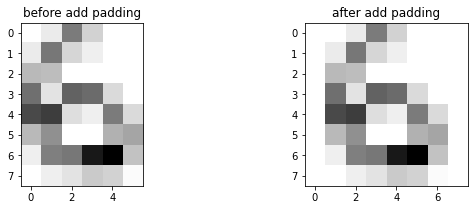

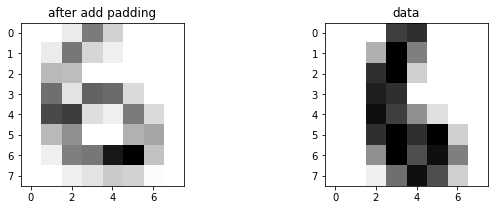

In [ ]:
show_2img_bi(resize, result, "before add padding", "after add padding")
show_2img_bi(result, digits.images[6], "after add padding", "data")

### 2.1.8 Normalize image [0, 16]

In [ ]:
result

array([[ 0,  0,  5, 32, 11,  0,  0,  0],
       [ 0,  5, 33, 10,  4,  0,  0,  0],
       [ 0, 17, 16,  0,  0,  0,  0,  0],
       [ 0, 35,  7, 38, 36,  9,  0,  0],
       [ 0, 44, 47,  8,  4, 32,  9,  0],
       [ 0, 17, 27,  0,  0, 19, 22,  0],
       [ 0,  4, 31, 33, 56, 62, 15,  0],
       [ 0,  0,  4,  7, 13, 11,  1,  0]], dtype=uint8)

In [ ]:
normalized = cv2.normalize(result, None, alpha=0, beta=16, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32S)
normalized

array([[ 0,  0,  1,  8,  3,  0,  0,  0],
       [ 0,  1,  9,  3,  1,  0,  0,  0],
       [ 0,  4,  4,  0,  0,  0,  0,  0],
       [ 0,  9,  2, 10,  9,  2,  0,  0],
       [ 0, 11, 12,  2,  1,  8,  2,  0],
       [ 0,  4,  7,  0,  0,  5,  6,  0],
       [ 0,  1,  8,  9, 14, 16,  4,  0],
       [ 0,  0,  1,  2,  3,  3,  0,  0]], dtype=int32)

### 2.1.9 Làm đậm

In [ ]:
def make_bold(img):
  bold = img.copy()
  for i in range(bold.shape[0]):
    for j in range(bold.shape[1]):
      if bold[i][j] >= 3 :
        bold[i][j] += 5
      if bold[i][j] > 16:
        bold[i][j] = 16
  return bold

bold = make_bold(normalized)

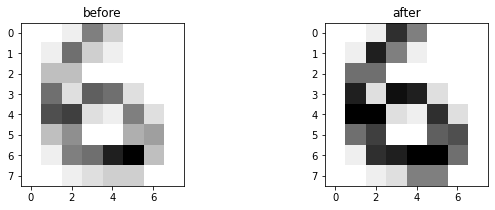

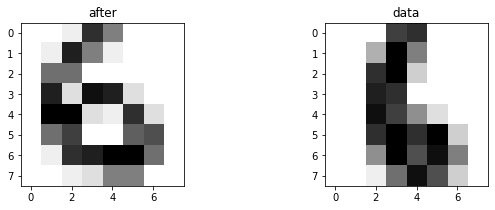

In [ ]:
show_2img_bi(normalized, bold, "before", "after")
show_2img_bi(bold, digits.images[6], "after", "data")

### 2.1.10 Flatten

In [ ]:
flatten = bold.reshape((1, -1))
flatten

array([[ 0,  0,  1, 13,  8,  0,  0,  0,  0,  1, 14,  8,  1,  0,  0,  0,
         0,  9,  9,  0,  0,  0,  0,  0,  0, 14,  2, 15, 14,  2,  0,  0,
         0, 16, 16,  2,  1, 13,  2,  0,  0,  9, 12,  0,  0, 10, 11,  0,
         0,  1, 13, 14, 16, 16,  9,  0,  0,  0,  1,  2,  8,  8,  0,  0]],
      dtype=int32)

## **2.2 Predict**

In [ ]:
clf.predict(flatten)

array([6])

# **3. Thực nghiệm**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
dir = '/content/drive/MyDrive/CS114'
# tham số để tăng độ sáng và độ tương phản
alpha, beta = 1.5, 30
arr_file_name = []

In [ ]:
def predict_from_directory(path_dir):
  arr_predict, arr_true = [], []
  
  for file_name in os.listdir(path_dir):
    
    # read image
    img = cv2.imread(os.path.join(path_dir, file_name))

    # smoothing image
    blured = cv2.GaussianBlur(img, (5, 5), 0) 

    # brightness and contract
    bright_and_constract =cv2.addWeighted(blured,alpha,np.zeros(blured.shape, blured.dtype),
                                          0,beta)

    # convert to grayscale
    gray = cv2.cvtColor(bright_and_constract, cv2.COLOR_BGR2GRAY)

    # threshold
    _, thresh_hold = cv2.threshold(gray, 190, 255, cv2.THRESH_BINARY_INV)

    # crop image
    crop = crop_image(thresh_hold)
    
    # resize về size = (6, 8)
    resize = resize_many_times_6x8(crop)

    # Nomarlize về khoảng [0, 16]
    normalized = cv2.normalize(resize, None, alpha=0, beta=16, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32S)
    
    # Làm đậm nét
    bold = make_bold(normalized)
  
    # Thêm padding để đủ size (8, 8)
    bold_add_padding = add_padding(bold)
 
    # Plot ảnh
    plt.figure(figsize=(3, 3))
    plt.imshow(bold_add_padding, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.show()

    # Flatten
    flatten = bold_add_padding.reshape((1, -1))

    # Predict
    predict = clf.predict(flatten)[0]

    true = file_name.split('_')[-1].split('.')[0]
    
    arr_file_name.append(file_name)

    arr_true.append(int(true))
    arr_predict.append(predict)
    print("true: {}, predict {}, file name {}".format(true, predict, file_name))
  return arr_true, arr_predict

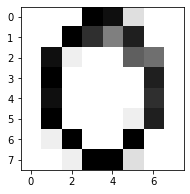

true: 0, predict 0, file name Vinh_0.jpg


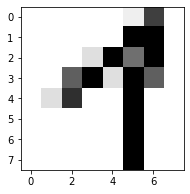

true: 1, predict 1, file name Vinh_1.jpg


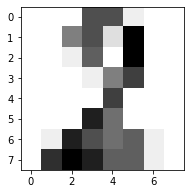

true: 2, predict 2, file name Vinh_2.jpg


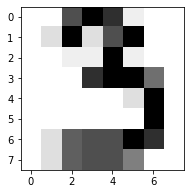

true: 3, predict 3, file name Vinh_3.jpg


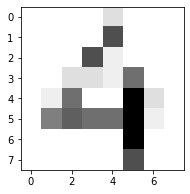

true: 4, predict 4, file name Vinh_4.jpg


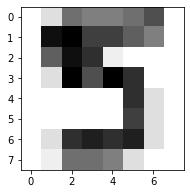

true: 5, predict 5, file name Vinh_5.jpg


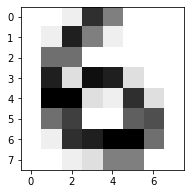

true: 6, predict 6, file name Vinh_6.jpg


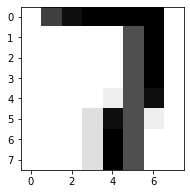

true: 7, predict 7, file name Vinh_7.jpg


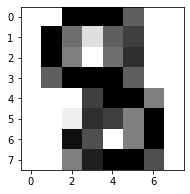

true: 8, predict 8, file name Vinh_8.jpg


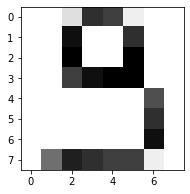

true: 9, predict 9, file name Vinh_9.jpg


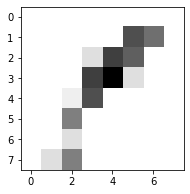

true: 0, predict 9, file name Minh_0.jpg


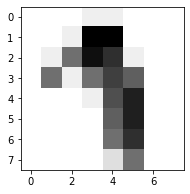

true: 1, predict 1, file name Minh_1.jpg


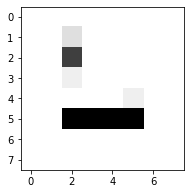

true: 2, predict 4, file name Minh_2.jpg


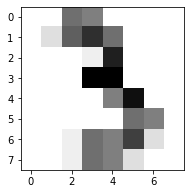

true: 3, predict 3, file name Minh_3.jpg


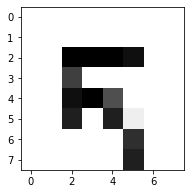

true: 5, predict 1, file name Minh_5.jpg


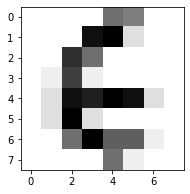

true: 6, predict 6, file name Minh_6.jpg


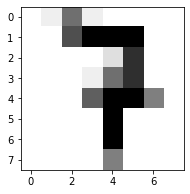

true: 7, predict 7, file name Minh_7.jpg


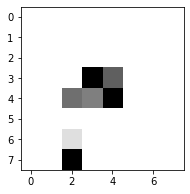

true: 8, predict 1, file name Minh_8.jpg


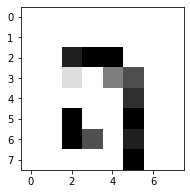

true: 9, predict 1, file name Minh_9.jpg


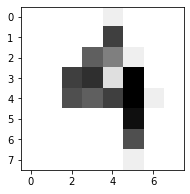

true: 4, predict 4, file name Minh_4.jpg


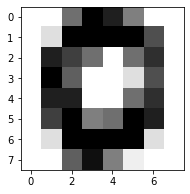

true: 0, predict 0, file name Danh_0.JPG


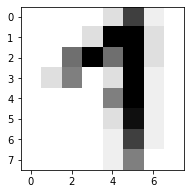

true: 1, predict 1, file name Danh_1.JPG


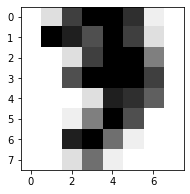

true: 3, predict 7, file name Danh_3.JPG


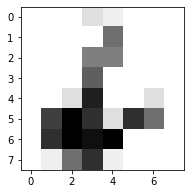

true: 2, predict 4, file name Danh_2.JPG


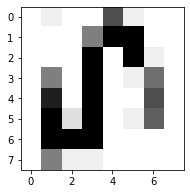

true: 5, predict 1, file name Danh_5.JPG


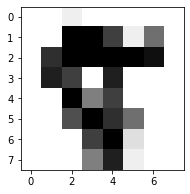

true: 4, predict 1, file name Danh_4.JPG


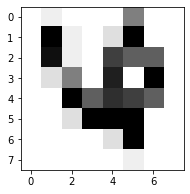

true: 6, predict 1, file name Danh_6.JPG


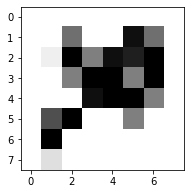

true: 8, predict 9, file name Danh_8.JPG


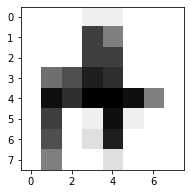

true: 7, predict 4, file name Danh_7.JPG


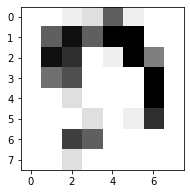

true: 9, predict 9, file name Danh_9.JPG


In [ ]:
true, predict = predict_from_directory(dir)

# **4. Đánh giá kết quả thực nghiệm**

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(true, predict)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.33      1.00      0.50         3
           2       1.00      0.33      0.50         3
           3       1.00      0.67      0.80         3
           4       0.40      0.67      0.50         3
           5       1.00      0.33      0.50         3
           6       1.00      0.67      0.80         3
           7       0.67      0.67      0.67         3
           8       1.00      0.33      0.50         3
           9       0.50      0.67      0.57         3

    accuracy                           0.60        30
   macro avg       0.79      0.60      0.61        30
weighted avg       0.79      0.60      0.61        30




Confusion matrix:
[[2 0 0 0 0 0 0 0 0 1]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 1 0 2 0 0 0 0 0]
 [0 0 0 2 0 0 0 1 0 0]
 [0 1 0 0 2 0 0 0 0 0]
 [0 2 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 2 0 0 0]
 [0 0 0 0 1 0 0 2 0 0]
 [0 1 0 0 0 0 0 0 1 1]
 [0 1 0 0 0 0 0 0 0 2]]


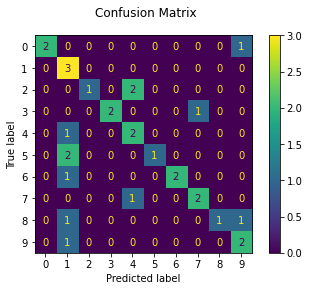

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(true, predict)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
dic = {"Vinh" : [[], []],
       "Danh" : [[], []],
       "Minh": [[], []]}
acc_score = []

In [ ]:
for file_name, predict_value in zip(arr_file_name, predict):
  name = file_name.split('_')[0]
  true_value = file_name.split('_')[-1].split('.')[0]

  dic[str(name)][0].append(int(true_value))
  dic[str(name)][1].append(predict_value)

In [ ]:
dic

{'Danh': [[0, 1, 3, 2, 5, 4, 6, 8, 7, 9], [0, 1, 7, 4, 1, 1, 1, 9, 4, 9]],
 'Minh': [[0, 1, 2, 3, 5, 6, 7, 8, 9, 4], [9, 1, 4, 3, 1, 6, 7, 1, 1, 4]],
 'Vinh': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]}

In [ ]:
for key, value in dic.items():
  print("Owner: ", key)
  print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(value[0], value[1])}\n"
  )
  acc_score.append(metrics.accuracy_score(value[0], value[1]))

Owner:  Vinh
Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


Owner:  Danh
Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

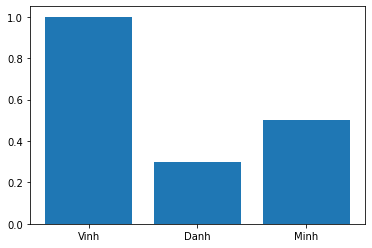

In [ ]:
name = ['Vinh', 'Danh', 'Minh']
plt.bar(name, acc_score)
plt.show()

# **5. Nhận xét và đánh giá kết quả thực nghiệm**


Đánh giá trên toàn bộ 30 ảnh:
 - Mô hình nhận diện đúng 18/30 ảnh
 - Điểm accuracy: 0.60
    + So với kết quả khi đánh giá trên tập test thì tệ hơn rất nhiều
    + Lý do trong tập ảnh thử nghiệm có những ảnh có nhiễu, nét chữ mờ làm cho kết quả tiền xử lý không tốt dẫn đến mô hình nhận diện sai.
---
Đánh giá bộ dữ liệu thử nghiệm của từng thành viên⁉
- Vinh: accuracy - 1.00
- Danh: accuracy - 0.30
- Minh: accuracy - 0.5

Bộ dữ liệu của bạn Vinh gồm những hình ảnh rõ nét, ít nhiễu cho kết quả tốt nhất. <br>
Bộ dữ liệu của bạn Danh gồm những hình ảnh có chữ số nhỏ, nhiều chi tiết nhiễu cho kết quả tệ nhất. <br>
Bộ dữ liệu của bạn Minh gồm những hình ảnh có nét chữ hơi mờ, chữ số to vừa phải, không có nhiễu cho kết quả trung bình.